## Lab #2

TA: Matt Ploenzke

Date: 4/12/2019

Today's lab consists of practice questions to review convolutional neural networks. We will be focusing on:
    1. CNN terminology (example and slides)
    2. Importing HW#2 data
    3. CNN training
    4. CNN feature visualization (optional)

### Problem 1
See powerpoint slides.

### Problem 2

In [1]:
import sys
import keras
import numpy as np
import os, shutil

Using TensorFlow backend.


First download the xrays-small dataset from canvas and place it in your working directory. 

If you wish to rerun the code later and have moved the dataset, you will need to adjust the paths below.

In [2]:
# Define directories of where the training, validation and test sets reside
# This is the path to where my files are - your path may be different
base_dir = './xrays-small'

train_dir = os.path.join(base_dir, 'train_dir')
validation_dir = os.path.join(base_dir, 'validation_dir')
test_dir = os.path.join(base_dir, 'test_dir')

train_infiltration_dir = os.path.join(train_dir, 'infiltration')
train_notinfiltration_dir = os.path.join(train_dir, 'notinfiltration')
validation_infiltration_dir = os.path.join(validation_dir, 'infiltration')
validation_notinfiltration_dir = os.path.join(validation_dir, 'notinfiltration')
test_infiltration_dir = os.path.join(test_dir, 'infiltration')
test_notinfiltration_dir = os.path.join(test_dir, 'notinfiltration')

In [3]:
# Let's check the number of images in each set
print('Total training infiltration images:', len(os.listdir(train_infiltration_dir)))
print('Total training not infiltration images:', len(os.listdir(train_notinfiltration_dir)))
print('Total validation infiltration images:', len(os.listdir(validation_infiltration_dir)))
print('Total validation not infiltration images:', len(os.listdir(validation_notinfiltration_dir)))
print('Total test infiltration images:', len(os.listdir(test_infiltration_dir)))
print('Total test not infiltration images:', len(os.listdir(test_notinfiltration_dir)))

Total training infiltration images: 500
Total training not infiltration images: 500
Total validation infiltration images: 225
Total validation not infiltration images: 226
Total test infiltration images: 225
Total test not infiltration images: 225


Now we're going to define the data generators. 

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import math

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size = (150, 150),
        batch_size = batch_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode = 'binary')

Found 1000 images belonging to 2 classes.
Found 450 images belonging to 2 classes.


Let's also define the number of samples per epoch for later.

In [5]:
num_training_samples = math.ceil((len(os.listdir(train_infiltration_dir)) + len(os.listdir(train_notinfiltration_dir)))/batch_size)
num_validation_samples = math.ceil((len(os.listdir(validation_infiltration_dir)) + len(os.listdir(validation_notinfiltration_dir)))/batch_size)

### Problem 3

Build a CNN of your choosing! Select the appropriate loss, optimizer, and metric. Make sure to include at least two instances of regularization to mitigate overfitting.

In [6]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxP

Train it.

In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = num_training_samples,
      epochs = 100,
      validation_data = validation_generator,
      validation_steps = num_validation_samples)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
32/32 [==============================] - 58s 2s/step - loss: 0.6980 - acc: 0.4953 - val_loss: 0.7008 - val_acc: 0.5000
Epoch 2/100
32/32 [==============================] - 60s 2s/step - loss: 0.6829 - acc: 0.5597 - val_loss: 0.6806 - val_acc: 0.6111
Epoch 3/100
32/32 [==============================] - 61s 2s/step - loss: 0.6800 - acc: 0.5772 - val_loss: 0.6642 - val_acc: 0.6156
Epoch 4/100
32/32 [==============================] - 61s 2s/step - loss: 0.6718 - acc: 0.5801 - val_loss: 0.6596 - val_acc: 0.6200
Epoch 5/100
32/32 [==============================] - 61s 2s/step - loss: 0.6679 - acc: 0.5947 - val_loss: 0.6613 - val_acc: 0.6133
Epoch 6/100
32/32 [==============================] - 61s 2s/step - loss: 0.6592 - acc: 0.6144 - val_loss: 0.6611 - val_acc: 0.6133
Epoch 7/100
32/32 [==============================] - 60s 2s/step - loss: 0.6478 - acc: 0.6386 - val_loss: 0.6499 - val_acc: 0.6156
Epoch 8/100
32/32 [================

32/32 [==============================] - 59s 2s/step - loss: 0.3604 - acc: 0.8524 - val_loss: 0.8867 - val_acc: 0.6111
Epoch 62/100
32/32 [==============================] - 59s 2s/step - loss: 0.3381 - acc: 0.8515 - val_loss: 0.8357 - val_acc: 0.6222
Epoch 63/100
32/32 [==============================] - 59s 2s/step - loss: 0.3531 - acc: 0.8427 - val_loss: 0.8338 - val_acc: 0.6067
Epoch 64/100
32/32 [==============================] - 59s 2s/step - loss: 0.3376 - acc: 0.8486 - val_loss: 0.8006 - val_acc: 0.6511
Epoch 65/100
32/32 [==============================] - 59s 2s/step - loss: 0.3106 - acc: 0.8799 - val_loss: 0.9289 - val_acc: 0.6133
Epoch 66/100
32/32 [==============================] - 59s 2s/step - loss: 0.3499 - acc: 0.8691 - val_loss: 0.9042 - val_acc: 0.6067
Epoch 67/100
32/32 [==============================] - 59s 2s/step - loss: 0.3312 - acc: 0.8593 - val_loss: 0.8598 - val_acc: 0.6289
Epoch 68/100
32/32 [==============================] - 60s 2s/step - loss: 0.3195 - acc: 0

Create plots of the accuracy and loss. The matplotlib library is used for this so you may need to download it (using your package manager) first.

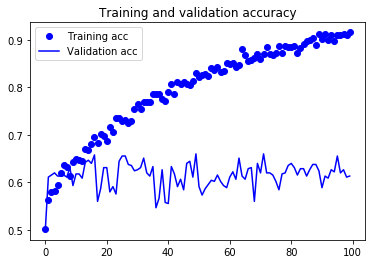

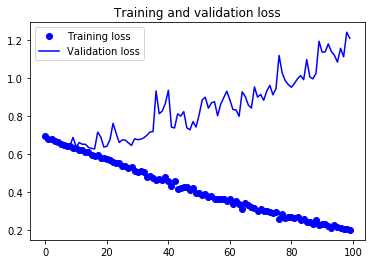

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Save the model for later

In [18]:
model.save('lung_nodules.h5')

### Problem 4

First, load a saved model or make sure the model from earlier is in memory.

In [19]:
model = models.load_model('lung_nodules.h5')

We'll set the path to a single image and check the shape. Then visualize the image.

(1, 150, 150, 3)


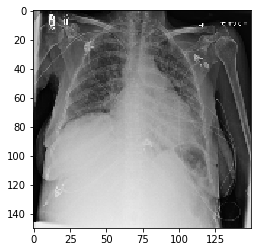

In [20]:
from keras.preprocessing import image 
import numpy as np

img_path = './xrays-small/test_dir/infiltration/Infiltration_726.png'
img = image.load_img(img_path, target_size=(150, 150)) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.
print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

Here we'll define a new model based on the loaded model. Specifically, we define a list for each layer (up to the first 9) in the loaded model. We then use this list to define a new model with the same input as the loaded model but now separate outputs for each set of activations.

In [21]:
layer_outputs = [layer.output for layer in model.layers[:8]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

Use the input example to obtain a prediction. 

In [22]:
activations = activation_model.predict(img_tensor)

Now we can grab the first convolutional layer activations and print the dimension.

In [23]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


Using matplotlib again we can visualize the activations. For example, the eighth filter.

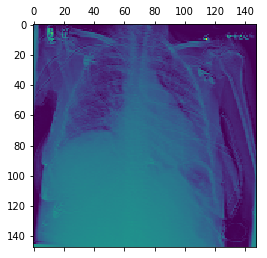

In [24]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')